In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import statistics
import scipy.special
import seaborn as sns
import pandas as pd
import requests
import PIL
import scipy.stats 

# Exponential distribution

## survival analysis perspective

Distribution arises when assuming a constnat hazard

$ h(t) = k $

$\therefore$

Quick refresher 

$f(t) = chance~of~event~at~any~time \\
F(t) = \int{ f(t) } \\
S(t) = 1-F(t) $

$ h(t) = \frac{f(t)}{S(t)} $

the probility of dying at a give point given that you have survived up until that point

$ h(t) = \frac{f(t)}{S(t)} \\
f(t) = h(t)*S(t) \\ 
f(t) = h(t)*(1-F(t)) \\
h(t) = \frac{f(t)}{1-F(t)} \\
h(t) = \frac{f(t)}{1-\int{f(t)}}  \\
\int{h(t)} = -\ln(1-\int(f(t)))~using~the~derivative~definition~of~a~limit~simply~use~a(t) = 1-F(t)~-~composite function\\ 
H(t) = -\ln(1-F(t)) \\
1- F(t) = e^{-H(t)} $

differentiate both sides

$ -f(t) = -h(t)e^{-H(t)} \\
f(t) = h(t)e^{-H(t)}$

plug in $ h(t) = k $

we get

$ f(t) = ke^{-kt} $







# Simple code and experiments with the exponential distribution

(array([3.32854450e-01, 1.32152168e-01, 5.50958343e-02, 2.02370168e-02,
        9.78493122e-03, 3.33577201e-03, 1.66788600e-03, 6.67154402e-04,
        5.55962001e-05, 1.11192400e-04]),
 array([1.93910775e-04, 1.79887799e+00, 3.59756207e+00, 5.39624615e+00,
        7.19493022e+00, 8.99361430e+00, 1.07922984e+01, 1.25909825e+01,
        1.43896665e+01, 1.61883506e+01, 1.79870347e+01]),
 <BarContainer object of 10 artists>)

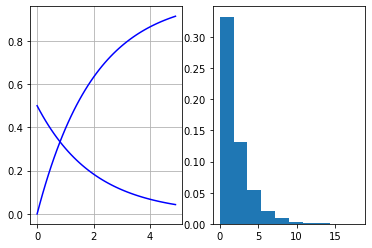

In [26]:
np.random.seed(seed = 1)

def f_exp(x,l):
    #PDF
    return l*np.exp(-l*x)

def F_exp(x,l):
    #CDF
    return 1-np.exp(-l*x)

def L_exp(x,l):
    #likelihood - exactly the same as PDF
    return l*np.exp(-l*x)

def l_exp(x,l):
    #log likelihood
    return np.log(l) - l*x

def s_exp(x,l):
    #Score
    return (1/l - x)

def exp_sample(l):
    x = np.random.uniform(0,1)

    #sample the inverse of the CDF
    return np.log(1-x)/-l


T = np.arange(0,5,0.1)

l = 0.5 #lambda

samples = [exp_sample(l) for i in range(10000)]

fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.plot(T,[f_exp(t,l) for t in T], c = "blue")
ax1.plot(T,[F_exp(t,l) for t in T], c = "blue")
ax1.grid(True)

ax2 = fig.add_subplot(122)
ax2.hist(samples, density= True)




# experiments with censoring

add a censoring function g(t)

## likelihood function very simple

$L(F) = \prod{h(T_i)^{\delta_i}S(T_i)} $

exponential has constant hazard and survial = 1- F()

$L(f) = \prod{\lambda^{d_i} e^{-\lambda t} }$

Simplifies to 

$L(f) = \lambda^{r} e^{-\lambda W} $

where R is total number of failurs and W = total FU time

then taking log

$l(f) = r ln(\lambda) -\lambda W $

and derivatives

$\dfrac{dl(f)}{d\lambda} = \dfrac{r}{\lambda} - W $

$-\dfrac{d^{2}l(f)}{d\lambda^{2}} = \dfrac{r}{\lambda^{2}}  $


From this we can work out the mean and information

## **expected value of lambda (first moment)**

$\dfrac{dl(f)}{d\lambda} = \dfrac{r}{\lambda} - W = 0$

$\lambda = W/r$ 

Total follow up/number of events = average arrival rate - inutitively makes sense

## **information**

Variance of first derivating of log likelihood

$var(\dfrac{d}{d\theta} l(X;\theta)) $

$ var = E[x^2] - E[x]^2 $

expected value (score) of the first moment; evaluated at the true parameter value Theta is 0

so all that is left is hte expected value of the square log likelihood

thus....

$I(\theta) = -E[~(\dfrac{d}{d\theta}l(X;\theta))^2~] $

under certain regularity conditions, the fischer information further simplifies to ...

$I(\theta) = -E[\dfrac{d^2}{d\theta^2} l(X;\theta)] $


Thus observed (or sample) information for the sample of exponentials is = 

$I(\lambda) = \dfrac{r}{\lambda^2} $

## individual information

r = numebr of uncensored observations has a binomial distribution 



In [34]:
np.random.seed(seed = 1)

#start with unifrom censoring
def Censor(min,max):
    return np.random.uniform(min,max)

n = 1000
l = 0.5
Ti = [exp_sample(l) for i in range(n)] #actual event times
Ci = [Censor(0,4) for i in Ti] #censor times 
Ui = [min(i,j) for i,j in zip(Ti,Ci)] #observed times
di = [1 if i<j else 0 for i,j in zip(Ti,Ci)] #indicator 

print(Ti[0:5])
print(Ci[0:5])
print(Ui[0:5])
print(di[0:5])





[3.9450176589462713, 7.304868293747487, 0.29670633751223663, 0.8107135010277844, 1.3204330940275957]
[3.5727878607159558, 3.2899343763957627, 1.0891366750052138, 2.345661778166896, 2.51132884065572]
[3.5727878607159558, 3.2899343763957627, 0.29670633751223663, 0.8107135010277844, 1.3204330940275957]
[0, 0, 1, 1, 1]


## Diving into fischer information a bit more.....

exponentail version of plot from #Fischer_information.ipynb (originally from https://www.youtube.com/watch?v=pneluWj-U-o)

looking at just 1 observation

$ f(x,\lambda) = \lambda e^{-\lambda x} $

$ L(x,\lambda) = \lambda e^{-\lambda x} $

Log likelihood

$ l(x,\lambda) = \log(\lambda) - \lambda x $

score with respect to $\lambda$

$ s(\lambda) = \dfrac{1}{\lambda} - x $

C:\Users\bruno\AppData\Local\Temp/ipykernel_24740/325275329.py:17: RuntimeWarning: divide by zero encountered in log
  return np.log(l) - l*x
C:\Users\bruno\AppData\Local\Temp/ipykernel_24740/325275329.py:21: RuntimeWarning: divide by zero encountered in double_scalars
  return (1/l - x)


0.8
1.3023693616478313
1.5625


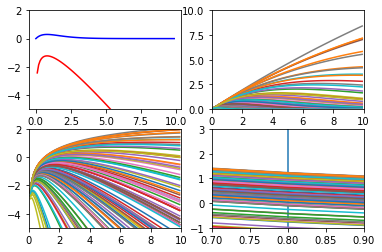

In [100]:
np.random.seed(seed = 2)

unknown_lambda = 0.8 #lambda
X = scipy.stats.expon.rvs(scale = (1/unknown_lambda), size = 100)
#python note = scale here is 1/lambda

possible_lambdas = np.arange(0,10,0.1)
#likelihood
test_x = 1/unknown_lambda
L = [f_exp(test_x,possible_lambda) for possible_lambda in possible_lambdas ]
#log likelihood
l = [l_exp(test_x,possible_lambda) for possible_lambda in possible_lambdas ]
#MLE estiamte of l 
print(possible_lambdas[l.index(max(l))])
# MLE works!!!!

#for multiple observations
Ls,ls,ss = [],[],[] 
for x in X:
    Ls.append( [L_exp(x,possible_lambda) for possible_lambda in possible_lambdas ] ) #likelihoods
    ls.append( [l_exp(x,possible_lambda) for possible_lambda in possible_lambdas ] ) #log likelihoods
    ss.append( [s_exp(x,possible_lambda) for possible_lambda in possible_lambdas ] ) #scores

fig = plt.figure()
ax1 = fig.add_subplot(221)
ax1.set(ylim = (-5,2))
ax1.plot(possible_lambdas,L,"blue")
ax1.plot(possible_lambdas,l,"red")

ax2 = fig.add_subplot(222)
ax2.set(xlim = (0,10), ylim = (0,10))
for L in Ls:
    ax2.plot(possible_lambdas,L)

ax3 = fig.add_subplot(223)
ax3.set(xlim = (0,10), ylim = (-5,2))
for l in ls:
    ax3.plot(possible_lambdas,l)

ax4 = fig.add_subplot(224)
ax4.set(xlim = (unknown_lambda-0.1,unknown_lambda+0.1), ylim = (-1,3))
ax4.axvline(x = unknown_lambda)
for s in ss:
    ax4.plot(possible_lambdas,s)

#estimating hte information provided by 1 sample
score_at_true_p = []
index = int(np.where(possible_lambdas == unknown_lambda)[0])
for s in ss:
    score_at_true_p.append(s[index])
#print(scores)
print(np.std(score_at_true_p)**2)
print((1/unknown_lambda)**2)



(array([ 238., 2467., 3666., 2251.,  945.,  319.,   81.,   21.,    8.,
           4.]),
 array([0.47934695, 0.86426108, 1.24917521, 1.63408934, 2.01900347,
        2.4039176 , 2.78883173, 3.17374586, 3.55865999, 3.94357412,
        4.32848825]),
 <BarContainer object of 10 artists>)

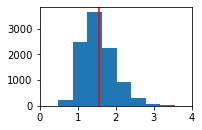

In [293]:
#lightweight testingg

unknown_lambda = 0.8 #lambda


estimate_i = []
for i in range(10000):
    X = scipy.stats.expon.rvs(scale = (1/unknown_lambda), size = 100)

    score_at_true_p = []
    for x in X:
        score_at_true_p.append(s_exp(x,unknown_lambda)) #scores

    #print(np.std(score_at_true_p)**2)
    #print((1/unknown_lambda)**2)
    estimate_i.append(np.std(score_at_true_p)**2)

#print(estimate_i)
fig = plt.figure()
ax1 = fig.add_subplot(221)
ax1.set(xlim = (0,4))
ax1.axvline(x = 1/(unknown_lambda**2),c = "red")
ax1.hist(estimate_i)


# will take a while for CLT to kick in due to skewness of graph!